<h1>Data Exploration</h1>
<p>In this notebook we will perform a broad data exploration on the <code>Boston</code> data set. Note that the aim of this exploration is not to be completely thorough; instead we would like to gain quick insights to help develop a first prototype. Upon analyzing the output of the prototype, we can analyze the data further to gain more insight.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/DataQualityReports.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p>We first read the comma-separated values (csv) <code>OJ</code> file into a pandas DataFrame. To get a feeling for the data we display the top five rows of the DataFrame using the <code>head()</code> method and we show how many rows and columns the DataFrame has by using the <code>shape</code> attribute. We also show the <code>dtypes</code> attribute, which returns a pandas Series with the data type of each column.</p>

In [2]:
df = pd.read_csv("OJ.csv")
df.head()
df.shape
df.dtypes

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


(1070, 18)

Purchase           object
WeekofPurchase      int64
StoreID             int64
PriceCH           float64
PriceMM           float64
DiscCH            float64
DiscMM            float64
SpecialCH           int64
SpecialMM           int64
LoyalCH           float64
SalePriceMM       float64
SalePriceCH       float64
PriceDiff         float64
Store7             object
PctDiscMM         float64
PctDiscCH         float64
ListPriceDiff     float64
STORE               int64
dtype: object

<p>Is appears that all the columns have the data type we would expect. We can perform another check to see if any values are missing in the DataFrame using its <code>isnull</code> method.</p>

In [3]:
df[df.isnull().any(axis=1)]
df[df.isnull().any(axis=1)].shape

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE


(0, 18)

<p>There are no obvious missing values in our data. So the next step to be able to produce the data quality reports with our custom <code>createDataQualityReports</code> function is to organize our DataFrame by quantitative and categorical variables using hierarchical indexing.</p>

In [4]:
df.columns = pd.MultiIndex.from_tuples([('categorical', 'Purchase'), ('quantitative', 'WeekofPurchase'), 
                                        ('categorical', 'StoreID'), ('quantitative', 'PriceCH'),
                                        ('quantitative', 'PriceMM'), ('quantitative', 'DiscCH'),
                                        ('quantitative', 'DiscMM'), ('categorical', 'SpecialCH'),
                                        ('categorical', 'SpecialMM'), ('quantitative', 'LoyalCH'),
                                        ('quantitative', 'SalePriceMM'), ('quantitative', 'SalePriceCH'),
                                        ('quantitative', 'PriceDiff'), ('categorical', 'Store7'),
                                        ('quantitative', 'PctDiscMM'), ('quantitative', 'PctDiscCH'),
                                        ('quantitative', 'ListPriceDiff'), ('categorical', 'STORE')],
                                        names=['type of variable', 'variable'])

df.sort_index(axis=1, level='type of variable', inplace=True)
df.head()

type of variable categorical                                           \
variable            Purchase STORE SpecialCH SpecialMM Store7 StoreID   
0                         CH     1         0         0     No       1   
1                         CH     1         0         1     No       1   
2                         CH     1         0         0     No       1   
3                         MM     1         0         0     No       1   
4                         CH     0         0         0    Yes       7   

type of variable quantitative                                           \
variable               DiscCH DiscMM ListPriceDiff   LoyalCH PctDiscCH   
0                        0.00    0.0          0.24  0.500000  0.000000   
1                        0.00    0.3          0.24  0.600000  0.000000   
2                        0.17    0.0          0.23  0.680000  0.091398   
3                        0.00    0.0          0.00  0.400000  0.000000   
4                        0.00    0.0          0.00  0.956535  0.000000   

type of variable                                                              \
variable         PctDiscMM PriceCH PriceDiff PriceMM SalePriceCH SalePriceMM   
0                 0.000000    1.75      0.24    1.99        1.75        1.99   
1                 0.150754    1.75     -0.06    1.99        1.75        1.69   
2                 0.000000    1.86      0.40    2.09        1.69        2.09   
3                 0.000000    1.69      0.00    1.69        1.69        1.69   
4                 0.000000    1.69      0.00    1.69        1.69        1.69   

type of variable                 
variable         WeekofPurchase  
0                           237  
1                           239  
2                           245  
3                           227  
4                           228

In [5]:
df_qr_quantitative, df_qr_categorical = createDataQualityReports(df)
'Quantitative Qualilty Report:'
df_qr_quantitative.round(2)
'Categorical Qualilty Report:'
df_qr_categorical.round(2)

'Quantitative Qualilty Report:'

,Count,Miss. (%),Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
variable,,,,,,,,,,
DiscCH,1070,0.0,12,0.00,0.00,0.05,0.00,0.00,0.50,0.12
DiscMM,1070,0.0,12,0.00,0.00,0.12,0.00,0.23,0.80,0.21
ListPriceDiff,1070,0.0,18,0.00,0.14,0.22,0.24,0.30,0.44,0.11
LoyalCH,1070,0.0,553,0.00,0.33,0.57,0.60,0.85,1.00,0.31
PctDiscCH,1070,0.0,13,0.00,0.00,0.03,0.00,0.00,0.25,0.06
PctDiscMM,1070,0.0,18,0.00,0.00,0.06,0.00,0.11,0.40,0.10
PriceCH,1070,0.0,10,1.69,1.79,1.87,1.86,1.99,2.09,0.10
PriceDiff,1070,0.0,36,-0.67,0.00,0.15,0.23,0.32,0.64,0.27
PriceMM,1070,0.0,8,1.69,1.99,2.09,2.09,2.18,2.29,0.13


'Categorical Qualilty Report:'

,Count,Miss. (%),Card.,Mode,Mode Freq.,Mode (%),2nd Mode,2nd Mode Freq.,2nd Mode (%)
variable,,,,,,,,,
Purchase,1070,0.0,2,CH,653,61.03,MM,417,38.97
STORE,1070,0.0,5,0,356,33.27,2,222,20.75
SpecialCH,1070,0.0,2,0,912,85.23,1,158,14.77
SpecialMM,1070,0.0,2,0,897,83.83,1,173,16.17
Store7,1070,0.0,2,No,714,66.73,Yes,356,33.27
StoreID,1070,0.0,5,7,356,33.27,2,222,20.75


<p>To further gain insight into the data, we use the <code>plotQuantitativeVariables</code> and <code>plotCategoricalVariables</code> functions the produce the frequency plots for each (quantitative) variable.</p>

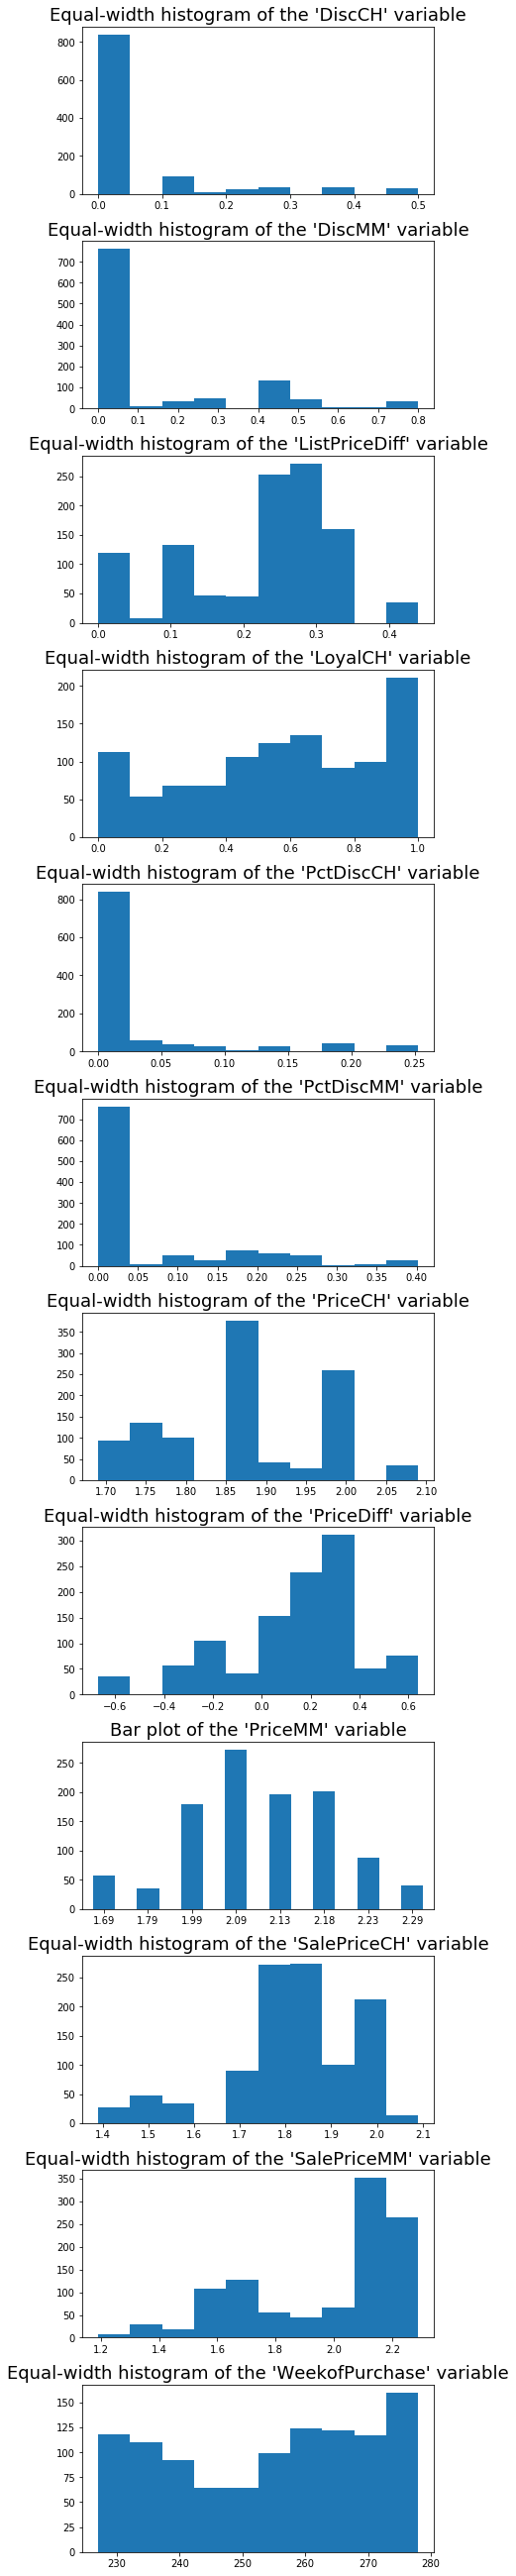

In [6]:
plotQuantitativeVariables(df.xs('quantitative', axis=1), height=3, width=7)

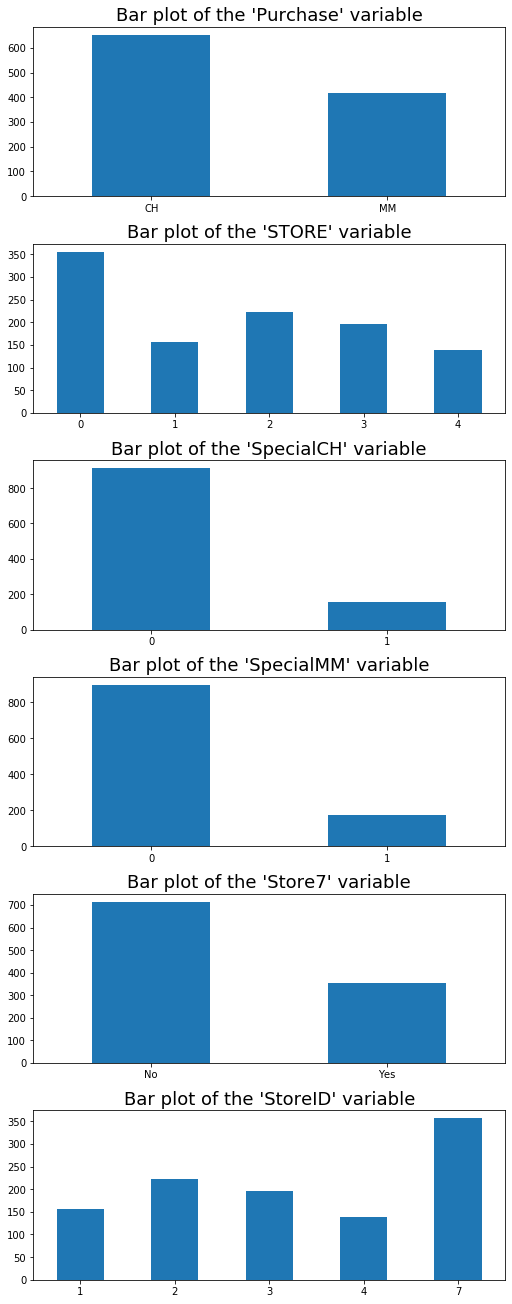

In [7]:
plotCategoricalVariables(df.xs('categorical', axis=1), height=3, width=7)

<p>We also compute the correlation matrix of the variables.</p>

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)